# Decoding  Emotions: Exploring Speech Emotion Recognization Using Acoustic Analysis

In [1]:
#pip install librosa==0.8.1

In [2]:
#pip install numpy==1.19.0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display #Very Important
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import IPython
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
tess_path = r"datasets/Tess"
crema_path = r"datasets/Crema"
tess_path
#Crema

'datasets/Tess'

In [5]:
tess = []
for folder in os.listdir(tess_path):
    #print(folder)
    for wav in os.listdir(os.path.join(tess_path,folder)):
        emotion = wav.partition('.wav')[0].split('_')
        #print(emotion)
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(tess_path,folder,wav)))
        else:
            tess.append((emotion[2],os.path.join(tess_path,folder,wav)))
            
tess_df = pd.DataFrame.from_dict(tess)
tess_df = tess_df.rename(columns={0: 'Emotion', 1: 'File_Path'})
tess_df

,Emotion,File_Path
0,angry,datasets/Tess\OAF_angry\OAF_back_angry.wav
1,angry,datasets/Tess\OAF_angry\OAF_bar_angry.wav
2,angry,datasets/Tess\OAF_angry\OAF_base_angry.wav
3,angry,datasets/Tess\OAF_angry\OAF_bath_angry.wav
4,angry,datasets/Tess\OAF_angry\OAF_bean_angry.wav
...,...,...
2795,sad,datasets/Tess\YAF_sad\YAF_witch_sad.wav
2796,sad,datasets/Tess\YAF_sad\YAF_yearn_sad.wav
2797,sad,datasets/Tess\YAF_sad\YAF_yes_sad.wav
2798,sad,datasets/Tess\YAF_sad\YAF_young_sad.wav


In [6]:
tess_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

In [7]:
crema = []
for wav in os.listdir(crema_path):
    emotion = wav.partition(".wav")[0].split('_')
    #print(emotion)
    if emotion[2] =='SAD':
        crema.append(('sad',os.path.join(crema_path,wav)))
    elif emotion[2] == 'DIS':
        crema.append(('disgust',os.path.join(crema_path,wav)))
    elif emotion[2] == 'FEA':
        crema.append(('fear',os.path.join(crema_path,wav)))   
    elif emotion[2] == 'HAP':
        crema.append(('happy',os.path.join(crema_path,wav)))    
    elif emotion[2] == 'NEU':
        crema.append(('neutral',os.path.join(crema_path,wav)))
    elif emotion[2] == 'ANG':
        crema.append(('angry',os.path.join(crema_path,wav)))
    else:
        crema.append(('unknown',os.path.join(crema_path,wav)))

#crema

crema_df = pd.DataFrame(crema)
crema_df = crema_df.rename(columns = {0:'Emotion',1:'File_Path'})
crema_df

,Emotion,File_Path
0,angry,datasets/Crema\1001_DFA_ANG_XX.wav
1,disgust,datasets/Crema\1001_DFA_DIS_XX.wav
2,fear,datasets/Crema\1001_DFA_FEA_XX.wav
3,happy,datasets/Crema\1001_DFA_HAP_XX.wav
4,neutral,datasets/Crema\1001_DFA_NEU_XX.wav
...,...,...
7437,disgust,datasets/Crema\1091_WSI_DIS_XX.wav
7438,fear,datasets/Crema\1091_WSI_FEA_XX.wav
7439,happy,datasets/Crema\1091_WSI_HAP_XX.wav
7440,neutral,datasets/Crema\1091_WSI_NEU_XX.wav


In [8]:
crema_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [9]:
df = pd.concat([tess_df,crema_df], axis = 0)
df

,Emotion,File_Path
0,angry,datasets/Tess\OAF_angry\OAF_back_angry.wav
1,angry,datasets/Tess\OAF_angry\OAF_bar_angry.wav
2,angry,datasets/Tess\OAF_angry\OAF_base_angry.wav
3,angry,datasets/Tess\OAF_angry\OAF_bath_angry.wav
4,angry,datasets/Tess\OAF_angry\OAF_bean_angry.wav
...,...,...
7437,disgust,datasets/Crema\1091_WSI_DIS_XX.wav
7438,fear,datasets/Crema\1091_WSI_FEA_XX.wav
7439,happy,datasets/Crema\1091_WSI_HAP_XX.wav
7440,neutral,datasets/Crema\1091_WSI_NEU_XX.wav


In [10]:
df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

In [11]:
df.shape

(10242, 2)

<AxesSubplot:xlabel='Emotion', ylabel='count'>

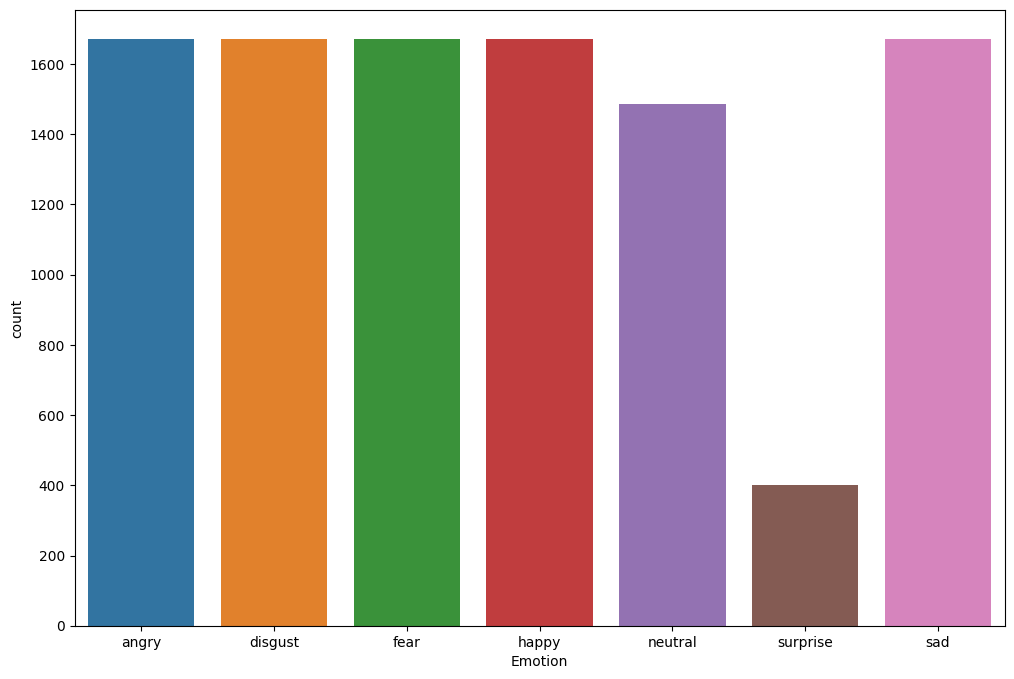

In [12]:
plt.figure(figsize = (12,8))
sns.countplot(x = df['Emotion'])

In [13]:
df.tail()

,Emotion,File_Path
7437,disgust,datasets/Crema\1091_WSI_DIS_XX.wav
7438,fear,datasets/Crema\1091_WSI_FEA_XX.wav
7439,happy,datasets/Crema\1091_WSI_HAP_XX.wav
7440,neutral,datasets/Crema\1091_WSI_NEU_XX.wav
7441,sad,datasets/Crema\1091_WSI_SAD_XX.wav


In [14]:
df.head()

,Emotion,File_Path
0,angry,datasets/Tess\OAF_angry\OAF_back_angry.wav
1,angry,datasets/Tess\OAF_angry\OAF_bar_angry.wav
2,angry,datasets/Tess\OAF_angry\OAF_base_angry.wav
3,angry,datasets/Tess\OAF_angry\OAF_bath_angry.wav
4,angry,datasets/Tess\OAF_angry\OAF_bean_angry.wav


In [15]:
emotion_names=df['Emotion'].unique()
emotion_names

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

In [16]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [17]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [18]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

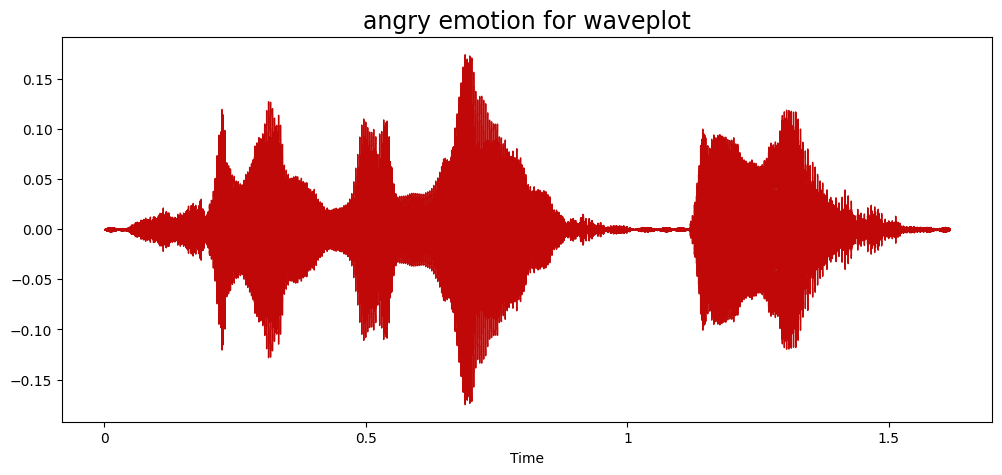

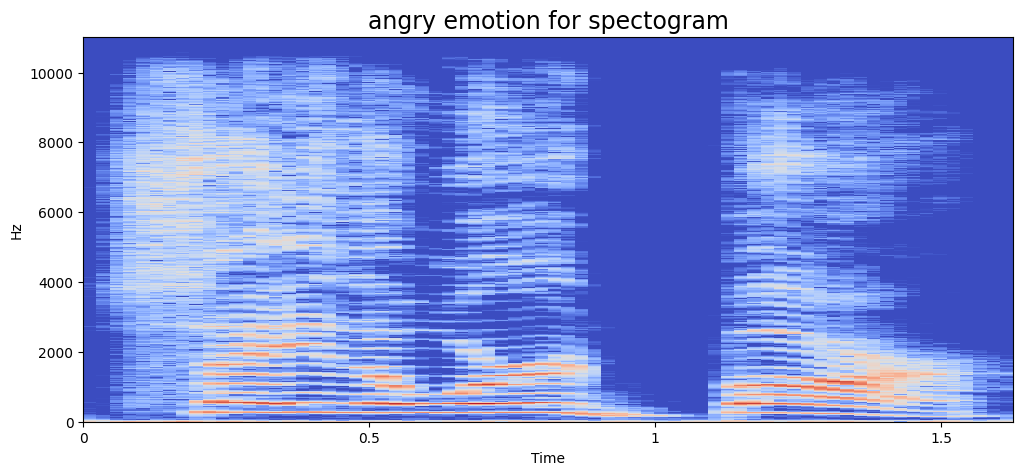

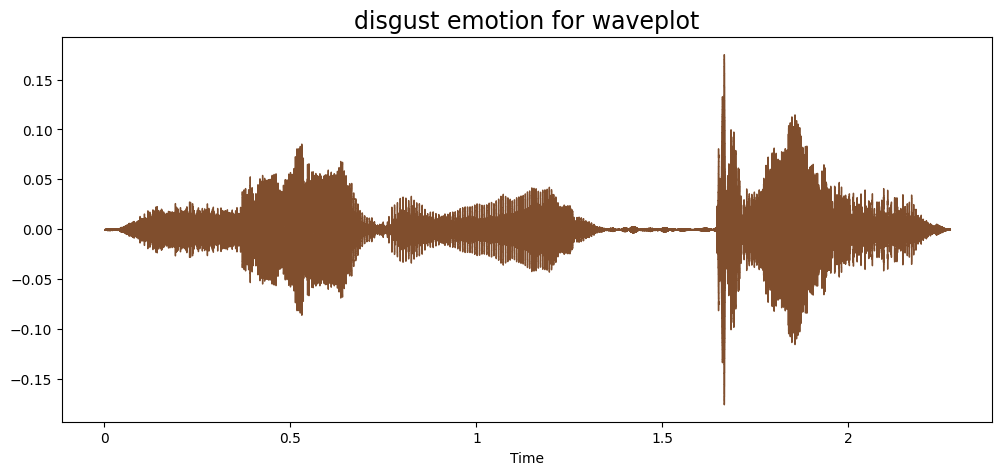

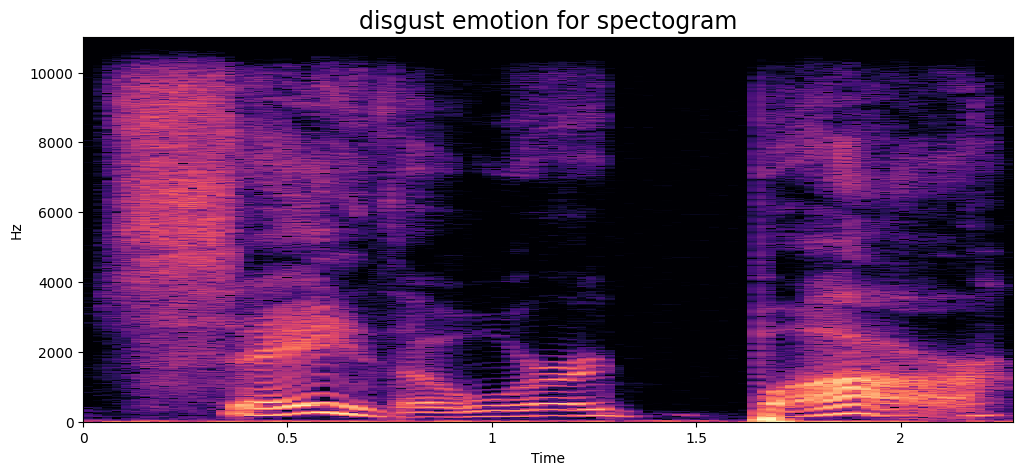

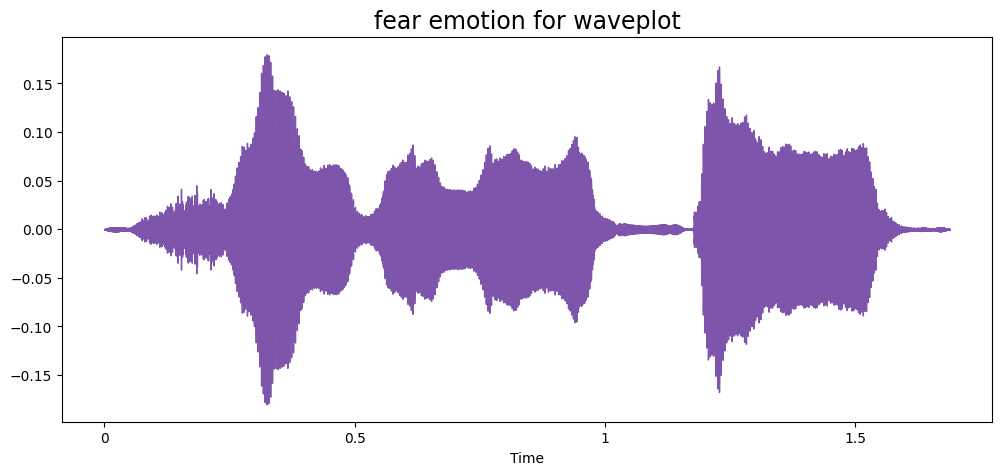

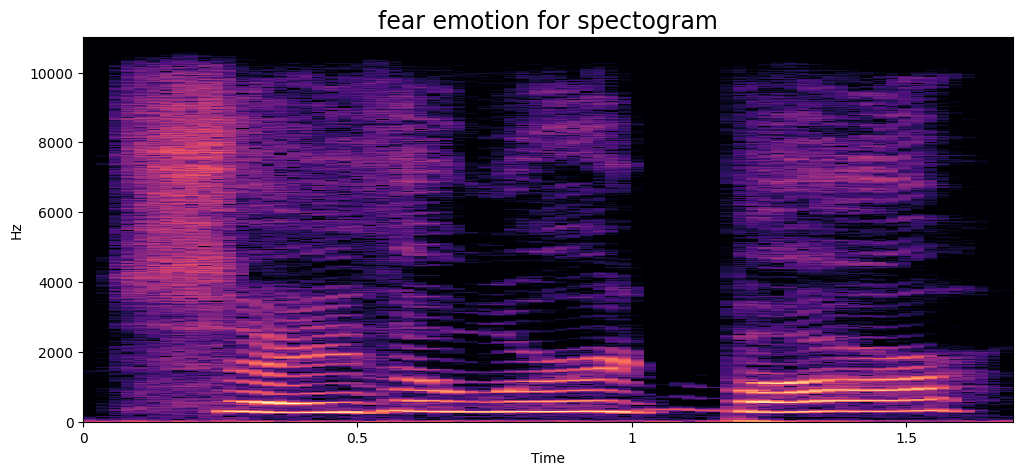

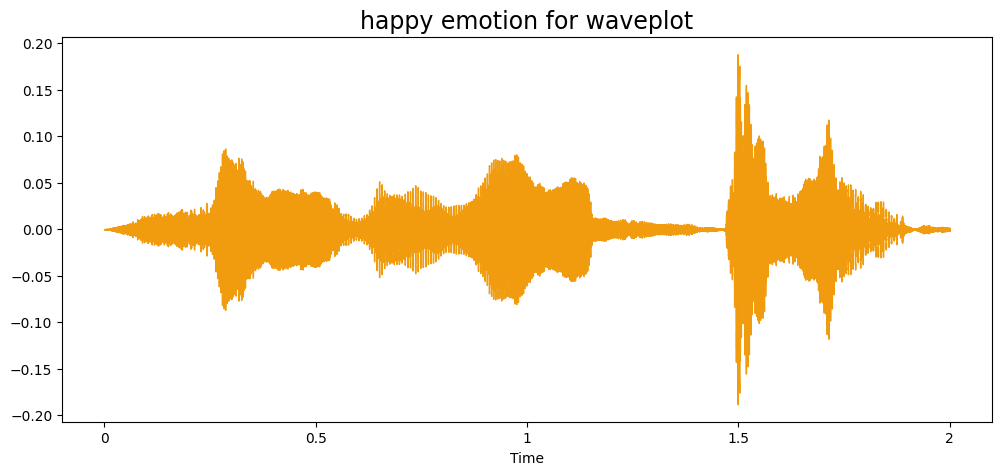

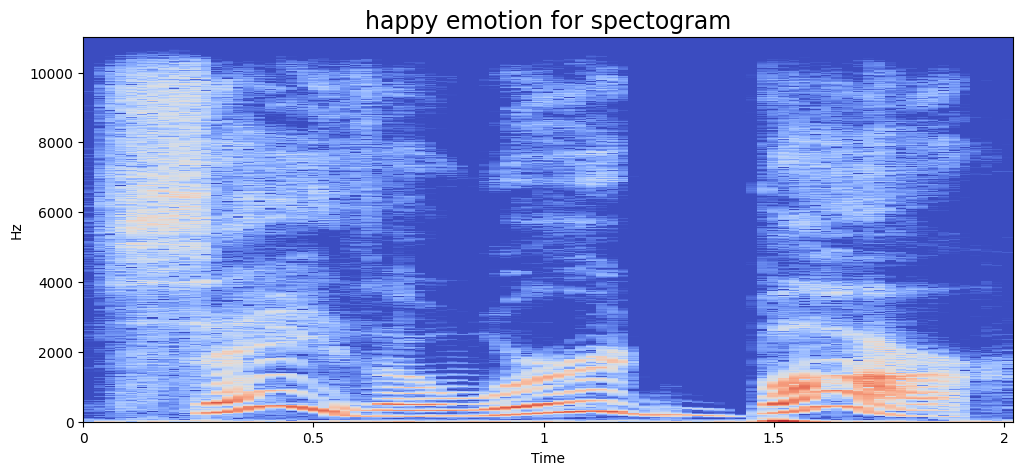

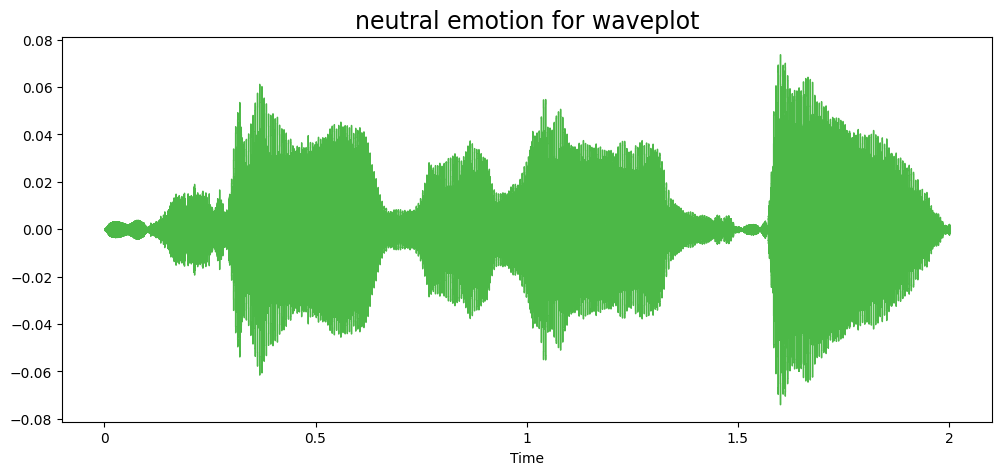

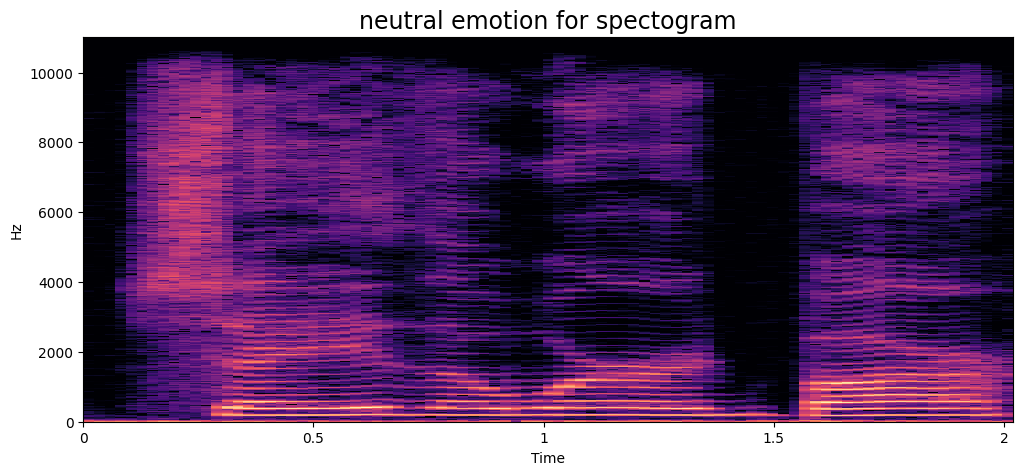

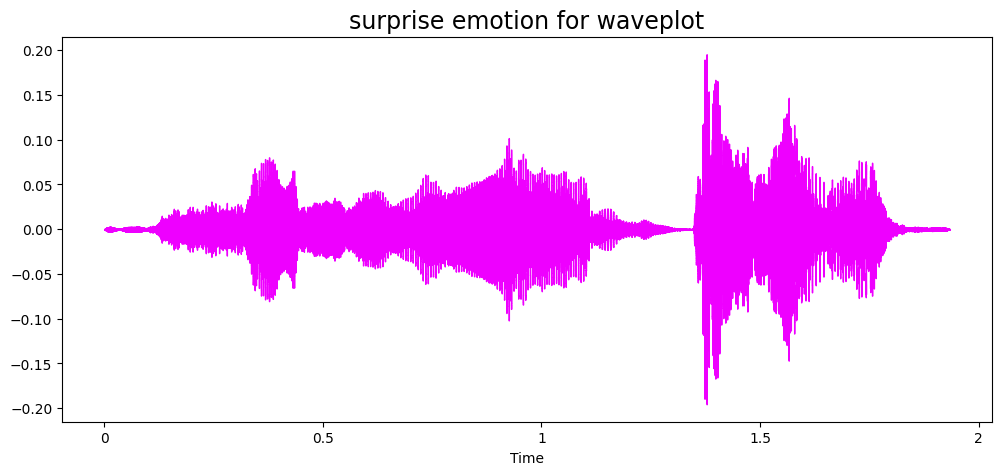

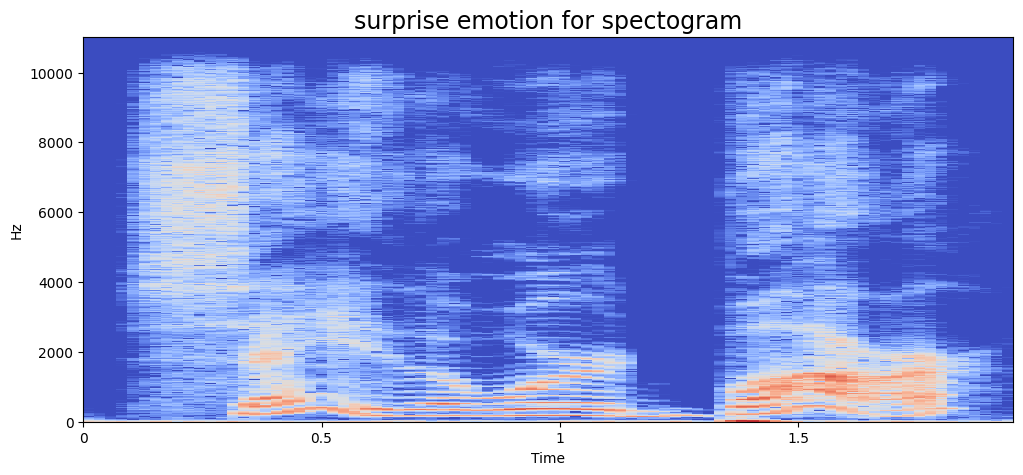

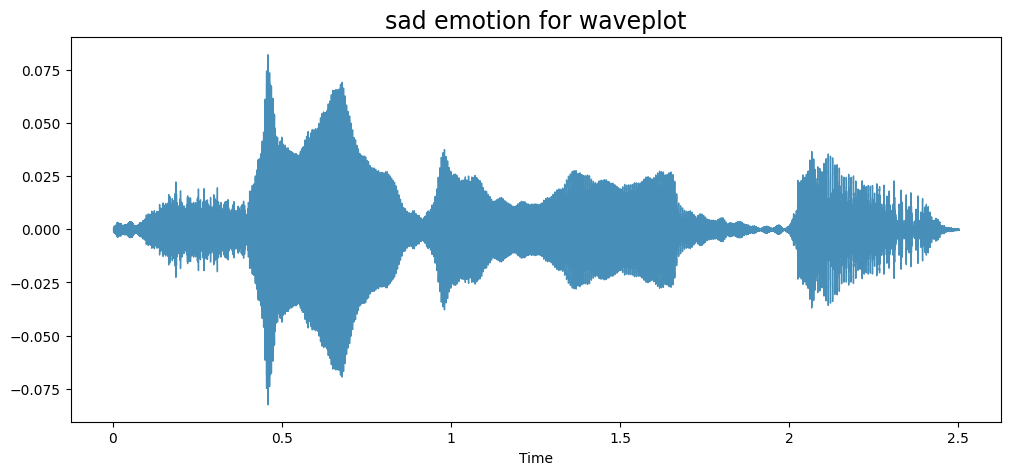

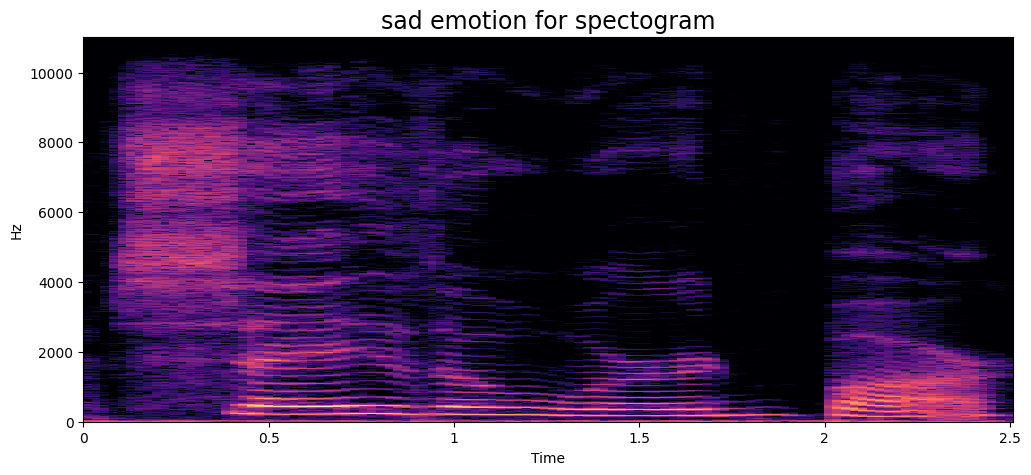

In [19]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(df['File_Path'][df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)
    

In [20]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [21]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [22]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate = rate)

def pitching(data, sr, pitch_factor=0.7, random=False):
    if random:
        pitch_factor = np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y = data, sr = sr, n_steps=int(pitch_factor))



In [23]:
data,sr=librosa.load(audio_path[6])

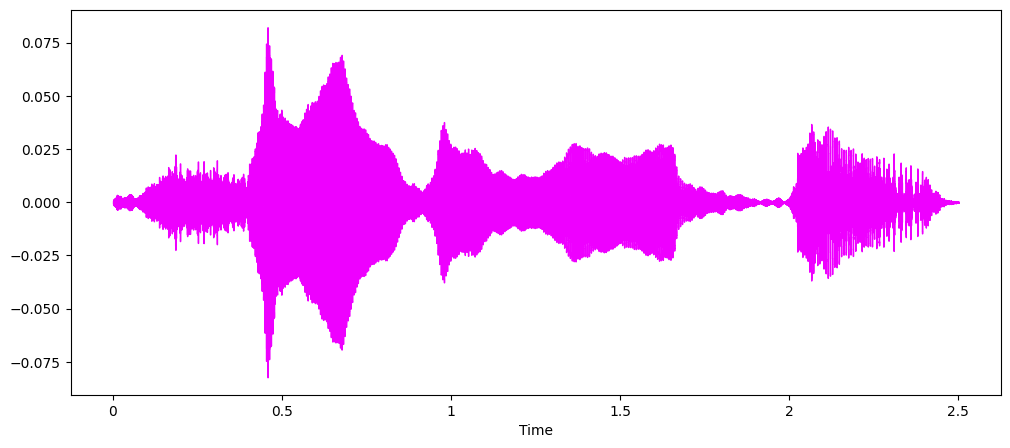

In [24]:
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sr, color='#EE00FF')
plt.show()
IPython.display.Audio(audio_path[6])


In [25]:
#Noised Audio

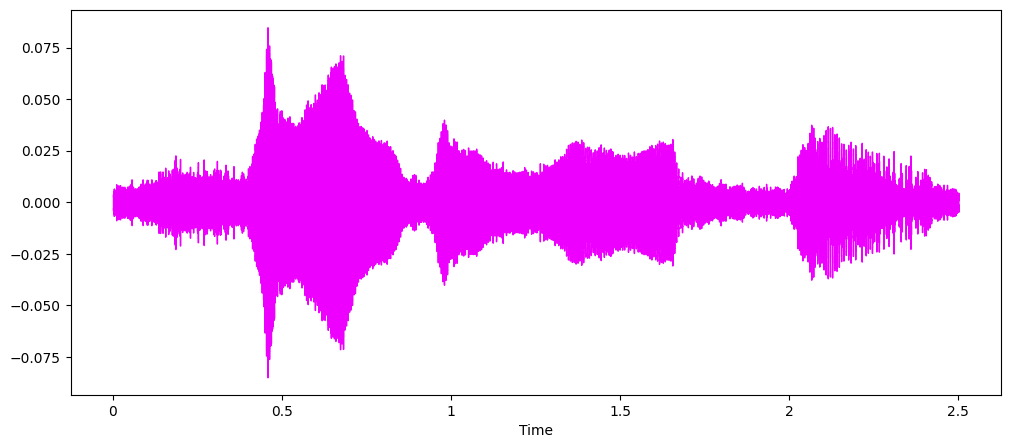

In [26]:
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,sr = sr,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)

In [27]:
#Feature Extraction

In [28]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y = data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)


def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

In [29]:
X,Y=[],[]
data='processed_data.csv'
if os.path.exists(data):
    dataset = pd.read_csv(data)
else:
    for path,emotion,index in zip(df.File_Path,df.Emotion,range(df.File_Path.shape[0])):
        features=get_features(path)
        if index%500==0:
            print(f'{index} audio has been processed')
        for i in features:
            X.append(i)
            Y.append(emotion)
            print('Done')
    processed_data = pd.DataFrame(x)
    processed_data['Emotion']=Y
    processed_data.to_csv(dataset, index = False)
    processed_data[10]

In [30]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.034180,0.069336,0.115723,0.148926,0.142090,0.130859,0.101562,0.070801,0.069336,0.074219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.060547,0.117188,0.185059,0.207520,0.187988,0.156250,0.107422,0.078613,0.088867,0.093750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.034180,0.069336,0.115723,0.148926,0.142090,0.130859,0.101562,0.070801,0.069336,0.074219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.117676,0.209961,0.307129,0.322754,0.282715,0.216797,0.146484,0.114746,0.139160,0.151367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.041504,0.059082,0.070312,0.062988,0.080566,0.128906,0.145508,0.146484,0.125977,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40963,0.015625,0.027832,0.056152,0.092773,0.125000,0.119141,0.098145,0.058105,0.025391,0.024414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad
40964,0.020996,0.029297,0.038086,0.029785,0.032715,0.032715,0.035156,0.035156,0.031738,0.029785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad
40965,0.022949,0.031250,0.040039,0.031738,0.033691,0.032715,0.035645,0.035156,0.031738,0.030762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad
40966,0.020996,0.029297,0.038086,0.029785,0.032715,0.032715,0.035156,0.035156,0.031738,0.029785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad


In [31]:
dataset['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40968 entries, 0 to 40967
Columns: 2377 entries, 0 to Emotion
dtypes: float64(2376), object(1)
memory usage: 743.0+ MB


In [33]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375
count,40968.000000,40968.000000,40968.000000,40968.000000,40968.000000,40968.000000,40968.000000,40968.000000,40968.000000,40968.000000,...,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,0.049716,0.074193,0.098430,0.097222,0.096117,0.095276,0.094614,0.094249,0.094227,0.094197,...,-0.914689,-2.388295,0.175731,-5.491156,-0.495389,-6.337330,-1.175383,-5.217049,-1.947062,-3.515868
std,0.051881,0.075210,0.096743,0.094663,0.092463,0.090708,0.089329,0.088489,0.087536,0.087005,...,4.989721,4.714542,5.349957,5.503598,5.193127,5.711352,4.914690,4.682480,4.457625,4.504383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-25.222160,-20.545139,-19.571972,-34.440414,-18.704214,-30.684158,-21.666708,-25.693115,-26.162067,-26.274006
25%,0.019043,0.029297,0.040039,0.040527,0.040527,0.041016,0.041016,0.041504,0.041992,0.041992,...,-3.559850,-5.219823,-3.219660,-9.016192,-3.967958,-9.918478,-4.468184,-8.176952,-4.750622,-6.155794
50%,0.028809,0.043945,0.060059,0.059570,0.060059,0.060547,0.061035,0.062012,0.062500,0.062988,...,-0.719680,-2.334436,-0.063580,-5.213278,-0.777118,-5.955978,-1.515533,-5.010638,-2.087771,-3.405321
75%,0.054199,0.082031,0.110840,0.108398,0.106934,0.106445,0.106445,0.105469,0.105957,0.106934,...,2.127846,0.607342,3.349600,-1.765487,2.616531,-2.404831,1.813128,-2.158025,0.694147,-0.770835
max,0.295898,0.442871,0.589355,0.583984,0.562500,0.568359,0.554199,0.569824,0.589355,0.587402,...,22.201463,17.863516,22.292862,13.552257,29.785248,27.218187,22.868120,11.226557,30.703201,22.428345


In [34]:
dataset.isnull().sum()

0              0
1              0
2              0
3              0
4              0
           ...  
2372       37080
2373       37080
2374       37080
2375       37080
Emotion        0
Length: 2377, dtype: int64

In [35]:
dataset=dataset.fillna(0)
dataset.isna().any()

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool

In [36]:
X = dataset.drop(['Emotion'],axis=1)
y = dataset['Emotion']
X

,0,1,2,3,4,5,6,7,8,9,...,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375
0,0.034180,0.069336,0.115723,0.148926,0.142090,0.130859,0.101562,0.070801,0.069336,0.074219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.060547,0.117188,0.185059,0.207520,0.187988,0.156250,0.107422,0.078613,0.088867,0.093750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.034180,0.069336,0.115723,0.148926,0.142090,0.130859,0.101562,0.070801,0.069336,0.074219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.117676,0.209961,0.307129,0.322754,0.282715,0.216797,0.146484,0.114746,0.139160,0.151367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.041504,0.059082,0.070312,0.062988,0.080566,0.128906,0.145508,0.146484,0.125977,0.072266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40963,0.015625,0.027832,0.056152,0.092773,0.125000,0.119141,0.098145,0.058105,0.025391,0.024414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40964,0.020996,0.029297,0.038086,0.029785,0.032715,0.032715,0.035156,0.035156,0.031738,0.029785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40965,0.022949,0.031250,0.040039,0.031738,0.033691,0.032715,0.035645,0.035156,0.031738,0.030762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40966,0.020996,0.029297,0.038086,0.029785,0.032715,0.032715,0.035156,0.035156,0.031738,0.029785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
y

0          angry
1          angry
2          angry
3          angry
4        disgust
          ...   
40963        sad
40964        sad
40965        sad
40966        sad
40967        sad
Name: Emotion, Length: 40968, dtype: object

In [38]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 5, 5, 5])

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 44)

In [41]:
X_train

array([[ 0.14289223, -0.04510128, -0.06857012, ...,  0.23555085,
         0.12427232,  0.19306703],
       [ 4.16167332,  3.59057495,  3.18692666, ...,  0.23555085,
         0.12427232,  0.19306703],
       [ 0.69818048,  0.59763434,  0.63300205, ...,  0.23555085,
         0.12427232,  0.19306703],
       ...,
       [ 0.1240689 , -0.05808583, -0.17961032, ...,  0.23555085,
         0.12427232,  0.19306703],
       [ 3.54991508,  3.65549774,  3.63613474, ..., -2.10073521,
         0.54813872, -0.54942927],
       [-0.32769104, -0.34374611, -0.40673801, ...,  0.23555085,
         0.12427232,  0.19306703]])

In [42]:
precision = []
recall = []
fscore = []
accuracy = []

labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad']
      

def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [43]:
# Random Forest Classifier

Random Forest Classifier Accuracy    : 85.80261980310796
Random Forest Classifier Precision   : 87.62110130669238
Random Forest Classifier Recall      : 86.10325012736631
Random Forest Classifier FSCORE      : 86.62212590512007

 Random Forest Classifier classification report
               precision    recall  f1-score   support

       angry       0.94      0.85      0.89      2200
     disgust       0.85      0.83      0.84      2080
        fear       0.77      0.95      0.85      1599
       happy       0.83      0.87      0.85      1969
     neutral       0.85      0.84      0.85      1809
    surprise       0.90      0.81      0.85      2177
         sad       0.89      0.99      0.94       457

    accuracy                           0.86     12291
   macro avg       0.86      0.88      0.87     12291
weighted avg       0.86      0.86      0.86     12291



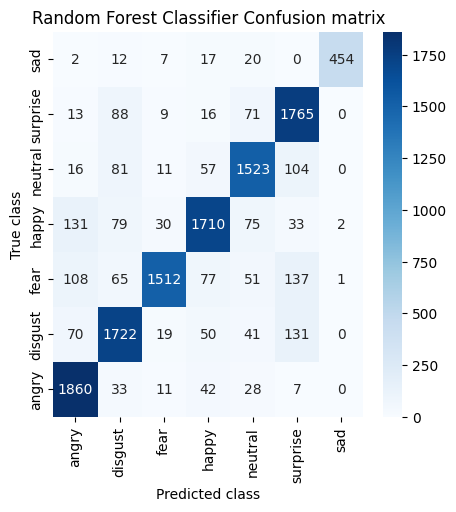

In [44]:
from sklearn.ensemble import RandomForestClassifier
import joblib
path = 'model/rfc_Classifier'
if(os.path.exists(path)):
    rfc = joblib.load(path) 

else:
    rfc = RandomForestClassifier(
    n_estimators=120,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,)
    rfc.fit(X_train, y_train)
    joblib.dump(rfc,path)

y_pred = rfc.predict(X_test)
performance_metrics('Random Forest Classifier', y_pred, y_test)

In [45]:
# xgboost Classifier

XGBoost Classifier Accuracy    : 95.52518102676756
XGBoost Classifier Precision   : 95.99436959090362
XGBoost Classifier Recall      : 95.64738417041835
XGBoost Classifier FSCORE      : 95.80816398547948

 XGBoost Classifier classification report
               precision    recall  f1-score   support

       angry       0.97      0.96      0.96      2003
     disgust       0.96      0.96      0.96      2032
        fear       0.93      0.97      0.95      1876
       happy       0.95      0.95      0.95      2060
     neutral       0.95      0.95      0.95      1798
    surprise       0.97      0.94      0.96      2026
         sad       0.97      1.00      0.98       496

    accuracy                           0.96     12291
   macro avg       0.96      0.96      0.96     12291
weighted avg       0.96      0.96      0.96     12291



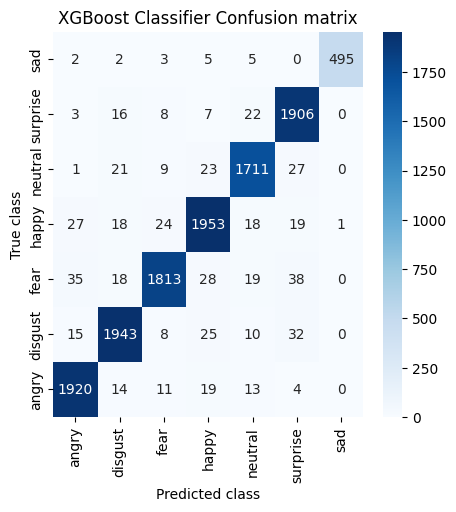

In [46]:
import xgboost as xgb
import joblib
path = 'model/xgb_Classifier'
if(os.path.exists(path)):
    xgc = joblib.load(path)

else:
    xgc = xgb.XGBClassifier() 
    xgc.fit(X_train, y_train)
    joblib.dump(xgc,path)

y_pred = xgc.predict(X_test)
performance_metrics('XGBoost Classifier', y_pred, y_test)